Modèle automatique

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("/home/user/Téléchargements/test_arima.csv")

In [5]:
#df

In [6]:
# Conversion de la date en datetime
from datetime import datetime
df['mois']=pd.to_datetime(df['mois'],infer_datetime_format=True)
df

,mois,y63,y15
0,2021-01-01,19.6,20
1,2021-02-01,53.0,83
2,2021-03-01,85.0,47
3,2021-04-01,74.0,70
4,2021-05-01,37.0,75
5,2021-06-01,37.0,89
6,2021-07-01,100.0,67
7,2021-08-01,98.0,93
8,2021-09-01,26.0,51
9,2021-10-01,26.0,89


In [7]:
# Mettre la date en index de la table
df.set_index('mois',inplace=True)
df

,y63,y15
mois,,
2021-01-01,19.6,20
2021-02-01,53.0,83
2021-03-01,85.0,47
2021-04-01,74.0,70
2021-05-01,37.0,75
2021-06-01,37.0,89
2021-07-01,100.0,67
2021-08-01,98.0,93
2021-09-01,26.0,51


In [8]:
#!pip install pmdarima

import pmdarima as pm

# Séparer les données en ensemble d'entraînement et ensemble de test
train_data = df['y63'][:-12]
test_data = df['y63'][-12:]

# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -102.653
Date:                Mon, 22 Apr 2024   AIC                            215.306
Time:                        07:23:38   BIC                            221.197
Sample:                    01-01-2021   HQIC                           216.869
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    153.7911     28.614      5.375      0.000      97.709     209.873
ar.L1         -0.3114      0.247     -1.263      0.207      -0.795       0.172
ar.L2         -0.5923      0.141     -4.205      0.0

In [11]:
# Ajuster le modèle aux données
model.fit(train_data)
# Obtenir les résidus du modèle
residuals = model.resid()



In [12]:
# Tracer la fonction d'autocorrélation (ACF) des résidus
plot_acf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF des résidus')
plt.show()

# Tracer la fonction d'autocorrélation partielle (PACF) des résidus
plot_pacf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF des résidus')
plt.show()

NameError: name 'plot_acf' is not defined

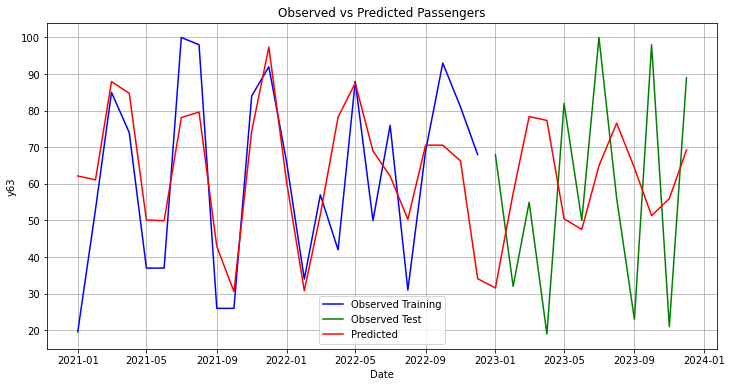

In [13]:
# Faire des prédictions sur l'ensemble d'entraînement
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index), 
                             pd.Series(predicted, index=test_data.index)], 
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')
plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('y63')
plt.title('Observed vs Predicted Passengers')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculer les mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_data, train_pred)
train_mse = mean_squared_error(train_data, train_pred)
train_rmse = mean_squared_error(train_data, train_pred, squared=False)
train_r2 = r2_score(train_data, train_pred)

# Calculer les mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, predicted)
test_mse = mean_squared_error(test_data, predicted)
test_rmse = mean_squared_error(test_data, predicted, squared=False)
test_r2 = r2_score(test_data, predicted)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)


  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                14.281142         31.334033
1      MSE               323.554151       1173.287828
2     RMSE                17.987611         34.253289
3       R²                 0.486649         -0.426743
